# Simple 1010 Pattern

Make Your First GAN With PyTorch, 2020

In [1]:
# import libraries

import torch
import torch.nn as nn

import pandas
import matplotlib.pyplot as plt
import random
import numpy

## Data Functions

In [2]:
# function to generate real data

def generate_real():
    real_data = torch.FloatTensor(
        [random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2),
         random.uniform(0.8, 1.0),
         random.uniform(0.0, 0.2)])
    return real_data

In [3]:
generate_real()

tensor([0.9377, 0.0400, 0.9937, 0.1360])

In [5]:
# function to generate uniform random data

def generate_random(size):
    random_data = torch.rand(size)
    return random_data

In [7]:
generate_random(4)

tensor([0.4713, 0.3689, 0.8848, 0.1619])

## Discriminator Network

In [4]:
??nn.Module

In [21]:
# discriminator class

class Discriminator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(4, 3),
            nn.Sigmoid(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )
        
        # create loss function
        self.loss_function = nn.MSELoss()

        # create optimiser, simple stochastic gradient descent
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        pass
    
    
    def forward(self, inputs):
        # simply run model
        return self.model(inputs)
    
    
    def train(self, inputs, targets):
        # calculate the output of the network
        outputs = self.forward(inputs)
        # calculate loss
        loss = self.loss_function(outputs, targets)
        print('outputs: ',outputs)
        print('targets: ',targets)
        
        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

## Test Discriminator

In [22]:
# test discriminator can separate real data from random noise

D = Discriminator()

for i in range(10000):
    # real data
    D.train(generate_real(), torch.FloatTensor([1.0]))
    # fake data
    D.train(generate_random(4), torch.FloatTensor([0.0]))
    pass

outputs:  tensor([0.3815], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3836], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3804], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3787], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3806], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3785], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3818], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3894], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3822], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3871], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3840], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3789], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.3840], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4296], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4205], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4224], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4217], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4194], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4210], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4249], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4238], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4182], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4240], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4245], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4237], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4219], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.4507], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4499], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4434], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4506], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4477], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4502], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4465], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4508], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4459], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4510], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4526], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4500], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4503], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.4672], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4596], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4686], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4699], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4681], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4653], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4678], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4700], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4693], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4682], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4687], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4609], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4686], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.4797], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4810], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4723], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4792], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4807], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4811], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4752], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4794], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4716], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4812], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4750], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4803], grad_fn=<Sigmo

outputs:  tensor([0.4884], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4798], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4863], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4866], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4873], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4758], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4884], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4771], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4883], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4790], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4875], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4838], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4884], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4929], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4866], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4928], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4883], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4909], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4839], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4917], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4843], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4908], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4885], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4931], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4876], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4933], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4864], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4942], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4890], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4953], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4907], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4962], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4811], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4942], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4964], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4951], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4820], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4958], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4859], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4945], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4968], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4949], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4971], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4877], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4967], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4886], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4979], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4974], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4836], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4980], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4819], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4848], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4976], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4825], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4989], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4827], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4977], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4862], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4988], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4904], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4989], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4856], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4970], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4805], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.4917], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5014], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4832], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5001], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4965], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4986], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4854], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4978], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4963], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4991], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4848], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4998], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4806], grad_fn=<Sigmo

outputs:  tensor([0.5016], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4912], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5014], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4904], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4785], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4997], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4948], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4992], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4875], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5009], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4765], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4999], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.4991], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4962], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4908], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4994], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4962], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5002], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4816], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5029], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4880], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5005], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4978], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5001], grad_fn=<Sigmo

outputs:  tensor([0.4759], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5016], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4765], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5011], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4814], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5007], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4846], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4988], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4808], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5001], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4821], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4999], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4754], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5027], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4777], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5048], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4955], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5006], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4834], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5027], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4896], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5034], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4775], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5030], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4903], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.4992], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4837], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5017], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4828], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5022], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4832], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5002], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4642], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5031], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4905], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5025], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4914], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5021], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4843], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4877], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5005], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4925], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5051], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4779], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5031], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4991], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5011], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5010], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4721], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5010], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4785], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5010], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4742], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5027], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4948], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5020], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4922], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5034], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4745], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5002], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4711], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5008], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4556], grad_fn=<Sigmo

outputs:  tensor([0.5026], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4940], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5020], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4901], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5045], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4859], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5032], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4937], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5022], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5013], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4888], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5061], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4874], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5055], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4719], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5016], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4854], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4644], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5050], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4861], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5031], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4990], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5022], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4789], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5026], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4672], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4828], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5094], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4751], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5075], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4951], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5069], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4477], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5048], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4958], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5082], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4621], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5068], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4844], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5059], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4477], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5065], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4936], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5082], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4738], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5020], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4843], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5073], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4552], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5099], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4787], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5093], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4750], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5104], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4784], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5080], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4703], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5083], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4831], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5070], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4771], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5038], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4699], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5122], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4714], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5092], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4850], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4860], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5140], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4494], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5057], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4905], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5076], grad_fn=<Sigmo

outputs:  tensor([0.4789], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5115], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4745], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5114], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4964], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5064], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4433], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5112], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4686], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5062], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4759], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5082], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4796], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.4699], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5105], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4837], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5124], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4550], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5151], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4905], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5110], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4516], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5066], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4718], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5069], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4575], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.4662], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5147], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4584], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5087], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4489], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5149], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4817], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5078], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4615], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5108], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4281], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5171], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4710], grad_fn=<Sigmo

outputs:  tensor([0.5134], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4233], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5047], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4523], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5136], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4369], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5140], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4158], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5141], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4392], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5117], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4615], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5049], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4657], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5188], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4766], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5148], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4486], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5074], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4739], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5118], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4335], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5192], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4585], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5143], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4449], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4721], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5179], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4664], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5133], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4624], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5221], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4801], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5185], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5025], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5159], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4575], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5148], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4534], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4366], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5145], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4742], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5165], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4026], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5210], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4514], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5242], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4225], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5166], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4356], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5222], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4649], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4856], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5158], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4682], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5175], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4513], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5199], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4461], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5239], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4710], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5181], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4596], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5238], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4389], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4138], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5228], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4532], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5191], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4612], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5221], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4266], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5183], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4517], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5190], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4177], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5221], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4020], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5201], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4359], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5314], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4307], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5321], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4529], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5340], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4445], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5250], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4661], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5253], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4542], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5240], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.5306], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4584], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5328], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4508], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5266], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5239], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5397], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4926], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5256], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4026], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5273], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3914], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5370], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.3940], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5429], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4186], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5270], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4644], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5384], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4936], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5254], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3735], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5240], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4258], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5286], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4708], grad_fn=<Sigmo

outputs:  tensor([0.4574], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5381], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4115], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5338], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4654], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5483], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4495], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5359], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4648], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5261], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4498], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5440], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3620], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3997], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5423], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4515], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5428], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5050], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5372], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4600], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5395], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3771], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5397], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4242], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5418], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4200], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4518], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5433], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4839], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5396], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4351], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5511], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4475], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5500], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4352], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5575], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4497], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5421], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3568], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5463], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3579], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5369], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4069], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5527], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3958], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5454], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3580], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5450], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4055], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5349], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4479], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5595], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5348], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3612], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5549], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4408], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5507], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3580], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5416], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4884], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5599], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4259], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5408], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3494], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5478], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5394], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4422], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5500], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4300], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5524], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4176], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5610], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4092], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5482], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4245], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5519], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4615], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5547], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4595], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5527], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4797], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5708], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4118], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5683], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3335], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5657], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4096], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5499], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3521], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5636], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4315], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4230], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5771], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3764], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5640], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3983], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5713], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4707], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5699], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3101], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5608], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4983], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5353], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4053], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4174], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5709], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3900], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5718], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3844], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5633], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5106], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5604], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5676], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3598], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5543], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3489], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3855], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5484], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5376], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5700], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3871], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5592], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4404], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5560], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3565], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5774], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3287], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5805], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3139], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.3786], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5576], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4142], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5739], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5826], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3573], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5796], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3494], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5763], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3491], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5644], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4456], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5753], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3389], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5767], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3601], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5643], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2992], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5622], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3831], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5748], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5179], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5813], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5047], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5949], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.3819], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5801], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4562], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5752], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3706], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5563], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4016], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5857], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2887], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5745], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4363], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5584], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2704], grad_fn=<Sigmo

outputs:  tensor([0.3084], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5797], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2610], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5610], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4502], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6072], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4412], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6029], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2989], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5804], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4630], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5894], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4300], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.4888], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5823], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3560], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6004], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5789], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6024], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4035], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5854], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3995], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5718], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3952], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5962], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3759], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.3666], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5971], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2623], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6109], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2421], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5898], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3640], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5845], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4060], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6037], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3675], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6086], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2709], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.6091], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4303], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5878], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4952], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5964], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3562], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5873], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4483], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6009], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3072], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6218], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3472], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6062], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.2087], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6238], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3339], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6330], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3918], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6160], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3196], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6287], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3289], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6010], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3027], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6296], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5880], grad_fn=<Sigmo

outputs:  tensor([0.3966], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5988], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3164], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5904], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4729], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6283], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2709], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6070], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3421], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6169], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4782], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6387], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2871], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.6213], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2658], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6146], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2890], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6396], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2063], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6159], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2608], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6293], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2953], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6348], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3203], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6423], grad_fn=<Sigmo

outputs:  tensor([0.1959], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6525], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3214], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5951], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2843], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6376], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3696], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6320], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3753], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6444], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4825], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6242], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3350], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.5965], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2104], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6605], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2624], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6343], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2932], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6392], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2108], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.5896], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2701], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6158], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2573], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6410], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6463], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2767], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6178], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3397], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6572], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2397], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6508], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3198], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6075], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4359], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6307], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3209], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6143], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.2526], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6368], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1761], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6406], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3560], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6201], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3662], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6483], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3470], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6407], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2620], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6214], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3270], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.1964], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6294], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3072], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6596], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2200], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6565], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5318], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6545], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1953], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6600], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6263], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6180], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5089], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.2863], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6334], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5734], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6512], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2190], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6450], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1834], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6643], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2855], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6875], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2354], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6283], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2523], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.6744], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1426], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6337], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1800], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6622], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2718], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6527], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1949], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6625], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2371], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6814], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3625], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6468], grad_fn=<Sigmo

outputs:  tensor([0.3131], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6739], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2073], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6398], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3531], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6671], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2525], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6594], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3099], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6786], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2652], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6635], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3471], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.2600], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6372], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2321], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6577], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3754], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6685], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5054], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6775], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4510], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6361], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4765], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6639], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3682], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.1807], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7011], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2607], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6952], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1436], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6529], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2574], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6771], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2026], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6790], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1493], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6589], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1236], grad_fn=<Sigmo

outputs:  tensor([0.6814], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4404], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6797], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1867], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7025], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1827], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6790], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2039], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6816], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6413], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6560], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1204], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6865], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.2610], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6571], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4797], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6759], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1861], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6653], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2985], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6576], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1868], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7056], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5799], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6691], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1574], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.2942], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6978], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2708], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6880], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2800], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6644], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2173], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6436], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1205], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6904], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2118], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7213], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1633], grad_fn=<Sigmo

outputs:  tensor([0.1427], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6906], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2369], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6715], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1871], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7040], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5021], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6375], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2107], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7051], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6008], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6752], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2670], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.3159], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6881], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4691], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7063], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5501], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7032], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3018], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6506], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1570], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6636], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4380], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7247], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1253], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.6780], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3570], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7120], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1904], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7430], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2965], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6796], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2360], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6825], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1969], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6910], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3000], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7008], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.3934], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7237], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1893], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7132], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2206], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7370], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2958], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7078], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1185], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6980], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2706], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6970], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3260], grad_fn=<Sigmo

outputs:  tensor([0.1341], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7172], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3094], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7125], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1726], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7112], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6276], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6928], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1730], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7212], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1622], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7267], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2159], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6337], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2105], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7199], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1903], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7294], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1696], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7256], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1391], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7088], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4991], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7020], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1748], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7286], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.1157], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7324], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1880], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7274], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2336], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6998], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1471], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7044], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1336], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6900], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1592], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6927], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1878], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6709], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1147], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7155], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2765], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7336], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1111], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7085], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6713], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7225], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1338], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7199], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1266], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6816], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.1691], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6616], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3028], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6877], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4868], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7038], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1162], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7494], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6637], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7325], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2502], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7538], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5494], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7357], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1425], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7123], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3138], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7183], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3956], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7296], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0893], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7576], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1923], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7407], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1535], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7219], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7175], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2132], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6865], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2184], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7408], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2084], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7368], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2026], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7002], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1635], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7333], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1947], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7422], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.6891], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6124], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7201], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1442], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7115], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1145], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6715], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5133], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7155], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1047], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7296], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4191], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7279], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.7021], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3895], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7599], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0970], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7398], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1361], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6912], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2988], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7253], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2818], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6928], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1392], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7240], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.6252], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7013], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1074], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7804], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1920], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7281], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1870], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7025], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.5277], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7525], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1247], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7349], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1687], grad_fn=<Sigmo

outputs:  tensor([0.6722], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3538], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7473], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2755], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7417], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1915], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7924], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2409], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7372], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3385], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7878], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0935], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7622], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([0.])
outputs:  tensor([0.7090], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1448], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6951], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0721], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7686], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2470], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7791], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0919], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7408], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1540], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7111], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3404], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7544], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.7505], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3123], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7497], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1734], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7882], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2130], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7596], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1038], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7330], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0725], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7156], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3274], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7434], grad_fn=<Sigmo

targets:  tensor([0.])
outputs:  tensor([0.7848], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2736], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7503], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2425], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7731], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1366], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7728], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0949], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7604], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2117], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7788], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2114], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7843], grad_fn=<Sigmo

targets:  tensor([1.])
outputs:  tensor([0.1370], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7639], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2285], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7534], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4125], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7414], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1947], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7212], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0750], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7523], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3266], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7594], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1704], grad_fn=<Sigmo

outputs:  tensor([0.7604], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2187], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7772], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0661], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7527], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1776], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7198], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2112], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7644], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4969], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7727], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1204], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7540], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7497], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1030], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7496], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.4522], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7809], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2164], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7107], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1088], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7775], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0821], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7806], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2005], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7627], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6307], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7874], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1849], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7199], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1005], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7108], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0754], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7679], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1039], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7503], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2983], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.6490], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1711], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.0812], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8127], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2004], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7743], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1316], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7146], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1972], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7710], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3778], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7560], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1283], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7653], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6188], grad_fn=<Sigmo

outputs:  tensor([0.1199], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7460], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6592], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7364], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0988], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7809], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1754], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7465], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1134], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7506], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6463], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7561], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1075], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.0985], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7559], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.6543], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7285], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3213], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7914], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1311], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7628], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0871], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7668], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2762], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7316], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2686], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.6895], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0577], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7135], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2116], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7361], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1739], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7230], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0513], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7896], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0870], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7122], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3777], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7902], grad_fn=<SigmoidBackward0>)
targets: 

outputs:  tensor([0.7716], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0686], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7449], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.3580], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7004], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1233], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7564], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1013], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7448], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0599], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7782], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1042], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.8040], grad_fn=<SigmoidBackward0>)
targets: 

targets:  tensor([1.])
outputs:  tensor([0.0461], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7780], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1438], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7965], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0899], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7591], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1416], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7658], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.2690], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7763], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.1580], grad_fn=<SigmoidBackward0>)
targets:  tensor([0.])
outputs:  tensor([0.7991], grad_fn=<SigmoidBackward0>)
targets:  tensor([1.])
outputs:  tensor([0.0917], grad_fn=<Sigmo

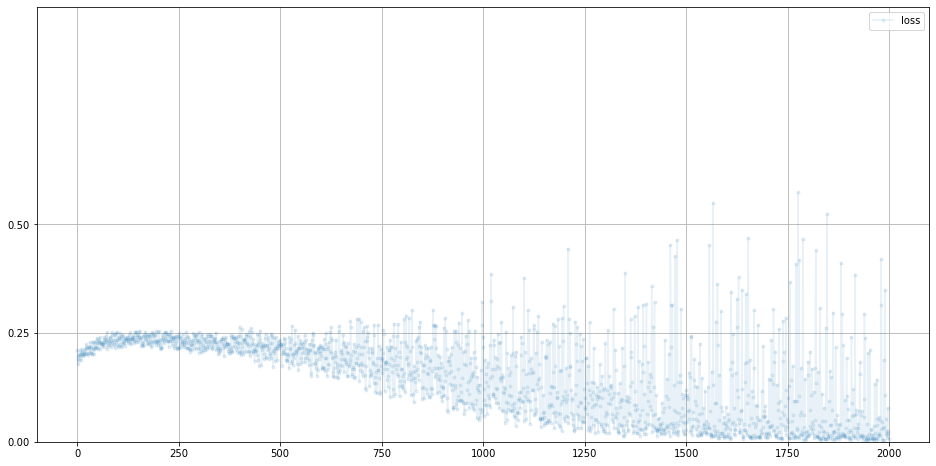

In [20]:
# plot discriminator loss

D.plot_progress()

In [0]:
# manually run discriminator to check it can tell real data from fake

print( D.forward( generate_real() ).item() )
print( D.forward( generate_random(4) ).item() )

0.8236010670661926
0.22374509274959564


## Generator Network

In [15]:
??nn.Module

In [16]:
# generator class

class Generator(nn.Module):
    
    def __init__(self):
        # initialise parent pytorch class
        super().__init__()
        
        # define neural network layers
        self.model = nn.Sequential(
            nn.Linear(1, 3),
            nn.Sigmoid(),
            nn.Linear(3, 4),
            nn.Sigmoid()
        )

        # create optimiser, simple stochastic gradient descent
        ## parameters(memo=None): 返回一个 包含模型所有参数 的迭代器。一般用作optimizer参数
        self.optimiser = torch.optim.SGD(self.parameters(), lr=0.01)

        # counter and accumulator for progress
        self.counter = 0;
        self.progress = []
        
        pass
    
    
    def forward(self, inputs):        
        # simply run model
        return self.model(inputs)
    
    
    def train(self, D, inputs, targets):
        # calculate the output of the network
        g_output = self.forward(inputs)
        
        # pass onto Discriminator 
        d_output = D.forward(g_output)   ## ⭐⭐⭐⭐⭐⭐⭐⭐ g 和 d 的本质区别
        
        # calculate error
        loss = D.loss_function(d_output, targets)

        # increase counter and accumulate error every 10
        self.counter += 1;
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass

        # zero gradients, perform a backward pass, update weights
        self.optimiser.zero_grad()
        loss.backward()
        self.optimiser.step()

        pass
    
    
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

## Test Generator Output

In [17]:
# check the generator output is of the right type and shape

G = Generator()

G.forward(torch.FloatTensor([0.5]))

tensor([0.6397, 0.5184, 0.4384, 0.6198], grad_fn=<SigmoidBackward0>)

## Train GAN

In [0]:
%%time 

# create Discriminator and Generator

D = Discriminator()
G = Generator()

image_list = []

# train Discriminator and Generator

for i in range(10000):
    
    # train discriminator on true
    D.train(generate_real(), torch.FloatTensor([1.0]))
    
    # train discriminator on false
    # use detach() so gradients in G are not calculated
    D.train(G.forward(torch.FloatTensor([0.5])).detach(), torch.FloatTensor([0.0]))
    
    # train generator
    G.train(D, torch.FloatTensor([0.5]), torch.FloatTensor([1.0]))
    
    # add image to list every 1000
    if (i % 1000 == 0):
      image_list.append( G.forward(torch.FloatTensor([0.5])).detach().numpy() )

    pass

counter =  10000
counter =  20000
CPU times: user 15 s, sys: 1.29 s, total: 16.3 s
Wall time: 16.3 s


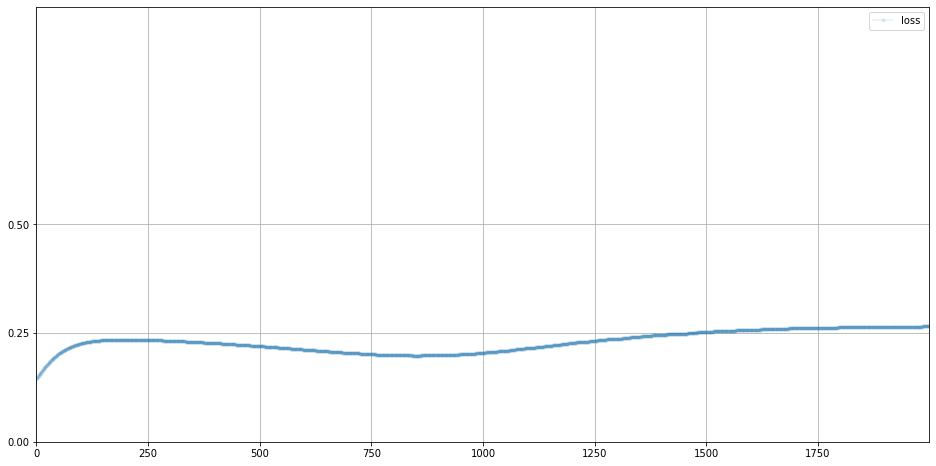

In [0]:
# plot discriminator error

D.plot_progress()

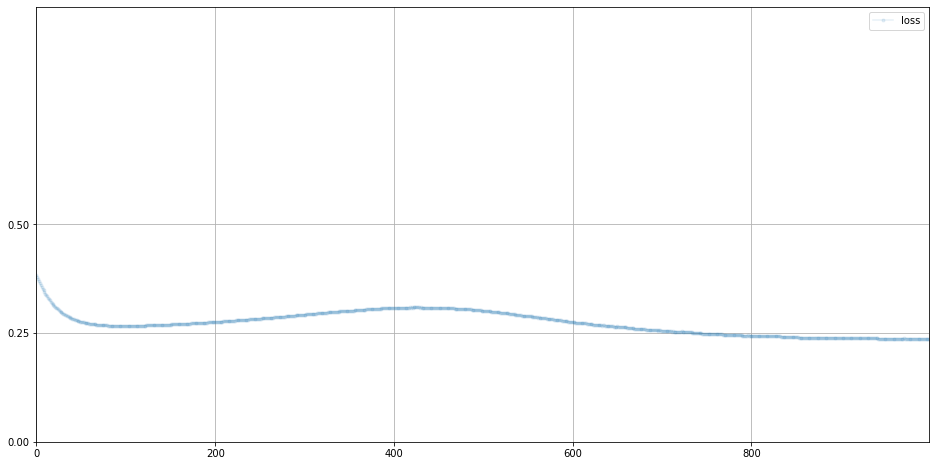

In [0]:
# plot generator error

G.plot_progress()

## Manually Run Generator

In [0]:
# manually run generator to see it's outputs

G.forward(torch.FloatTensor([0.5]))

tensor([0.9387, 0.0527, 0.9389, 0.0474], grad_fn=<SigmoidBackward>)

## Visualise Pattern During Training

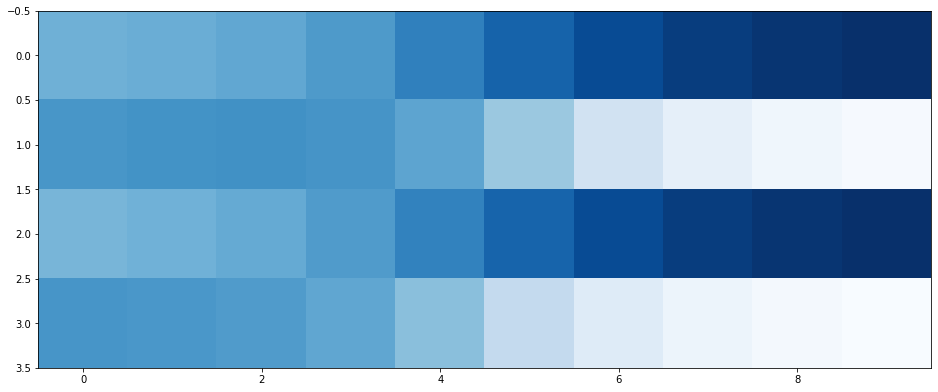

In [0]:
# plot images collected during training

plt.figure(figsize = (16,8))

plt.imshow(numpy.array(image_list).T, interpolation='none', cmap='Blues')